In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#use gym.ObservationWrapper if only wanting to change action
class CartpoleWrapper(gym.core.Wrapper):
    """
    This wrapper adds 'reached_goal' property, where goal is to keep the cartpole upright for 200 steps.
    """
    def __init__(self, env):
        super(CartpoleWrapper, self).__init__(env)
        self._steps = 0
        self._max_steps = env.spec.max_episode_steps

    def reset(self):
        self._steps = 0
        return self.env.reset()

    def step(self, action):
        self._steps += 1
        return self.env.step(action)
    
    def get2Dstate(self, curr_state, prev2Dstate = None):
        # curr_state numpy array [xpos, xvel, angle, angle vel]
        # max values are:         [+-2.4, inf, +-41.8, inf]
        x_edges, y_edges = np.linspace(-1.2, 1.2, 101), np.linspace(-12*np.pi/180, 12*np.pi/180, 101)
        new_pos, _, _ = np.histogram2d([curr_state[0], ], [curr_state[2], ], bins=(x_edges, y_edges))
        prev_pos, _, _ = np.histogram2d([curr_state[0]-curr_state[1], ], [curr_state[2]-curr_state[3], ], bins=(x_edges, y_edges))
        
        if prev2Dstate is None:
            return new_pos + 0.7*prev_pos
        else:
            return new_pos + 0.7*prev2Dstate   
        
    def printState(self, state_2D):
        plt.imshow(state_2D, extent=[-1.2, 1.2, -12*np.pi/180, 12*np.pi/180], cmap='jet', aspect='auto')
        plt.show()
        
    def getActionSize(self):
        x = 0
        while self.action_space.contains(x):
            x += 1
        return x
        
        
    # @property
    # def reached_goal(self):
    #     return self._steps >= self._max_steps

In [15]:
#use gym.ObservationWrapper if only wanting to change action

class CartpoleWrapper(gym.core.Wrapper):
    """
    This wrapper adds 'reached_goal' property, where goal is to keep the cartpole upright for 200 steps.
    """
    def __init__(self, env):
        super(CartpoleWrapper, self).__init__(env)
        self._steps = 0
        self._max_steps = env.spec.max_episode_steps
        self._state

    def reset(self):
        self._steps = 0
        self._state_ = np.array([0, 0, 0, 0]) # need to 
        return self._state

    def step(self, action):
        self.__steps += 1
        return self.env.step(action)
    
    def get2Dstate(self, curr_state, prev2Dstate = None):
        # curr_state numpy array [xpos, xvel, angle, angle vel]
        # max values are:         [+-2.4, inf, +-41.8, inf]
        x_edges, y_edges = np.linspace(-1.2, 1.2, 101), np.linspace(-12*np.pi/180, 12*np.pi/180, 101)
        new_pos, _, _ = np.histogram2d([curr_state[0], ], [curr_state[2], ], bins=(x_edges, y_edges))
        prev_pos, _, _ = np.histogram2d([curr_state[0]-curr_state[1], ], [curr_state[2]-curr_state[3], ], bins=(x_edges, y_edges))
        
        if prev2Dstate is None:
            return new_pos + 0.7*prev_pos
        else:
            return new_pos + 0.7*prev2Dstate   
        
    def printState(self, state_2D):
        plt.imshow(state_2D, extent=[-1.2, 1.2, -12*np.pi/180, 12*np.pi/180], cmap='jet', aspect='auto')
        plt.show()
        
    def getActionSize(self):
        x = 0
        while self.action_space.contains(x):
            x += 1
        return x
        
        
    # @property
    # def reached_goal(self):
    #     return self._steps >= self._max_steps

In [16]:
if __name__ == "__main__":
    env = CartpoleWrapper(gym.make("CartPole-v1"))

AttributeError: 'CartpoleWrapper' object has no attribute '_state'

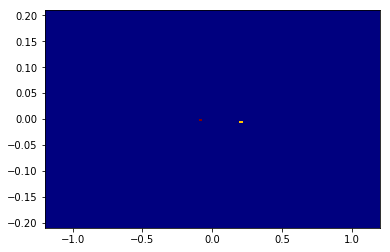

[ 0.0194146  -0.21017918 -0.01351767  0.24231892]


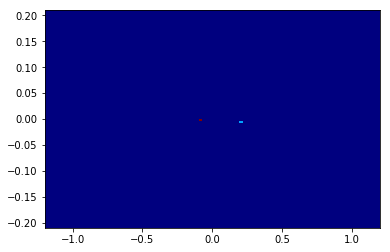

[ 0.01521101 -0.40510546 -0.00867129  0.53070755]


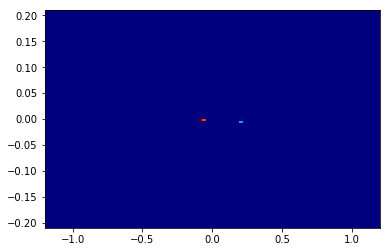

[ 0.00710891 -0.60010436  0.00194286  0.82064559]


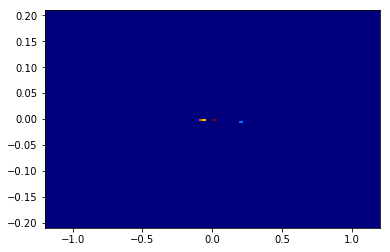

[-0.00489318 -0.79525285  0.01835577  1.11393897]


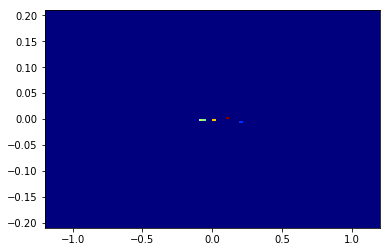

[-0.02079824 -0.99061095  0.04063455  1.41232305]


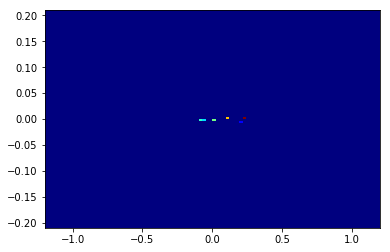

[-0.04061046 -1.18621235  0.06888102  1.71742623]


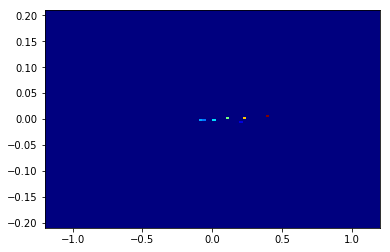

[-0.06433471 -1.3820531   0.10322954  2.03072574]


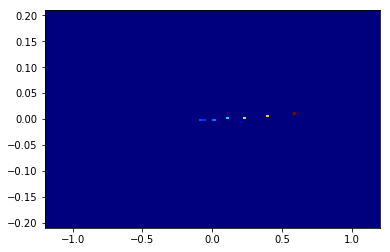

[-0.09197577 -1.57807813  0.14384405  2.35349361]


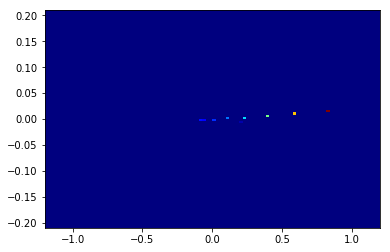

[-0.12353733 -1.77416521  0.19091393  2.686731  ]


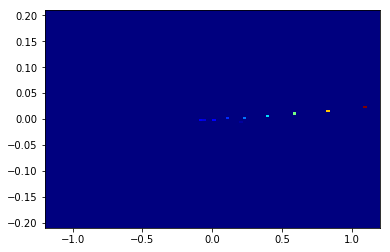

[-0.15902063 -1.97010651  0.24464855  3.03109127]


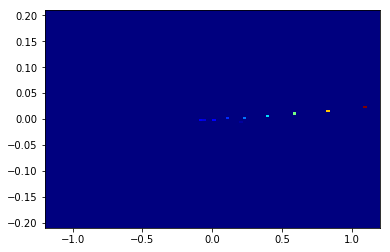

In [148]:
start_obs = env.reset()
total_reward = 0.0
state2D = env.get2Dstate(start_obs)
env.printState(state2D)

while True:
    
    obs, reward, done, _ = env.step(0)
    print(obs)
    state2D = env.get2Dstate(obs, state2D)
    env.printState(state2D)

    if done:
        break

In [149]:
env.getActionSize()

2